In [17]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load and Preprocess Data

In [4]:
df=pd.read_csv('data.csv')

In [5]:
df.head()

,self_empl_flag,comp_no_empl,tech_comp_flag,mh_coverage_flag,mh_coverage_awareness_flag,mh_employer_discussion,mh_resources_provided,mh_anonimity_flag,mh_medical_leave,mh_discussion_neg_impact,...,mh_family_hist,mh_disorder_past,mh_disorder_current,mh_diagnos_proffesional,mh_sought_proffes_treatm,mh_eff_treat_impact_on_work,mh_not_eff_treat_impact_on_work,sex,remote_flag,tech_flag
0,0.0,2.0,1.0,2.0,1.0,1.0,1.0,0.0,5.0,1.0,...,1.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1
1,0.0,4.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,1.0,...,2.0,2.0,2.0,1.0,1.0,3.0,4.0,0.0,1.0,1
2,0.0,4.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1
3,1.0,2.0,1.0,3.0,1.0,1.0,1.0,0.0,3.0,0.0,...,1.0,2.0,2.0,1.0,1.0,4.0,4.0,0.0,2.0,0
4,0.0,4.0,0.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,...,2.0,2.0,2.0,1.0,1.0,4.0,4.0,1.0,2.0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   self_empl_flag                   1235 non-null   float64
 1   comp_no_empl                     1235 non-null   float64
 2   tech_comp_flag                   1235 non-null   float64
 3   mh_coverage_flag                 1235 non-null   float64
 4   mh_coverage_awareness_flag       1235 non-null   float64
 5   mh_employer_discussion           1235 non-null   float64
 6   mh_resources_provided            1235 non-null   float64
 7   mh_anonimity_flag                1235 non-null   float64
 8   mh_medical_leave                 1235 non-null   float64
 9   mh_discussion_neg_impact         1235 non-null   float64
 10  ph_discussion_neg_impact         1235 non-null   float64
 11  mh_discussion_cowork             1235 non-null   float64
 12  mh_discussion_superv

In [7]:
X=df.drop('mh_disorder_current', axis=1)

In [8]:
y=df['mh_disorder_current']

# Train Test Split

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=32)

# Model Training

confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

In [99]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

def train_scores(model, model_name, n_classes):
    pred = model.predict(x_train)
    print('****** For Training on ', model_name, 'Model ******\n')
    
    # Print confusion matrix
    print('The Confusion Matrix:\n', confusion_matrix(y_train, pred))
    
    # Print accuracy score
    acc_score = accuracy_score(y_train, pred)
    print('\n The Accuray Score:', acc_score)
    
    # Print recall score
    recall = recall_score(y_train==2, pred==2)
    print('\n The Recall Score:', recall)
    
    # Print precision score
    precision = precision_score(y_train==2, pred==2)
    print('\n The Precision Score:', precision)
    
    # Print F1 score
    f1 = f1_score(y_train==2, pred==2)
    print('\n The F1 Score:', f1)
    
    # Compute and print ROC AUC score for multiclass classification
    y_train_binarized = label_binarize(y_train, classes=range(n_classes))
    y_pred_binarized = label_binarize(pred, classes=range(n_classes))
    roc_auc = roc_auc_score(y_train_binarized, y_pred_binarized, multi_class='ovr')
    print('\n The ROC AUC Score:', roc_auc)



    y_pred_prob=model.predict_proba(x_train)

    fpr = {}
    tpr = {}
    thresholds = {}
    roc_auc = {}
    for i in range(y_pred_prob.shape[1]):
        fpr[i], tpr[i], thresholds[i] = roc_curve(y_train, y_pred_prob[:, i], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # plot ROC curve for each class
    plt.figure()
    for i in range(y_pred_prob.shape[1]):
        plt.plot(fpr[i], tpr[i], label='Class {} (AUC = {:0.2f})'.format(i, roc_auc[i]))

    # plot the random guessing line
    plt.plot([0, 1], [0, 1], 'k--')

    # format the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


In [100]:
def test_scores(model, model_name, n_classes):
    pred = model.predict(x_test)
    print('****** For Testing on', model_name, 'Model ******\n')
    
    # Print confusion matrix
    print('The Confusion Matrix:\n', confusion_matrix(y_test, pred))
    
    # Print accuracy score
    acc_score = accuracy_score(y_test, pred)
    print('\n The Accuray Score:', acc_score)
    
    # Print recall score
    recall = recall_score(y_test==2, pred==2)
    print('\n The Recall Score:', recall)
    
    # Print precision score
    precision = precision_score(y_test==2, pred==2)
    print('\n The Precision Score:', precision)
    
    # Print F1 score
    f1 = f1_score(y_test==2, pred==2)
    print('\n The F1 Score:', f1)
    
    # Compute and print ROC AUC score for multiclass classification
    y_test_binarized = label_binarize(y_test, classes=range(n_classes))
    y_pred_binarized = label_binarize(pred, classes=range(n_classes))
    roc_auc = roc_auc_score(y_test_binarized, y_pred_binarized, multi_class='ovr')
    print('\n The ROC AUC Score:', roc_auc)



    y_pred_prob=model.predict_proba(x_test)

    fpr = {}
    tpr = {}
    thresholds = {}
    roc_auc = {}
    for i in range(y_pred_prob.shape[1]):
        fpr[i], tpr[i], thresholds[i] = roc_curve(y_test, y_pred_prob[:, i], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # plot ROC curve for each class
    plt.figure()
    for i in range(y_pred_prob.shape[1]):
        plt.plot(fpr[i], tpr[i], label='Class {} (AUC = {:0.2f})'.format(i, roc_auc[i]))

    # plot the random guessing line
    plt.plot([0, 1], [0, 1], 'k--')

    # format the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()



****** For Training on  Logistic Regression Model ******

The Confusion Matrix:
 [[104  44  65]
 [ 27 281  48]
 [ 24  17 378]]

 The Accuray Score: 0.7722672064777328

 The Recall Score: 0.9021479713603818

 The Precision Score: 0.769857433808554

 The F1 Score: 0.8307692307692308

 The ROC AUC Score: 0.8031362102159814


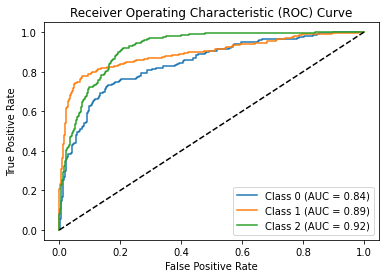

In [101]:
model = LogisticRegression(max_iter=10000)
model.fit(x_train,y_train)
train_scores(model,'Logistic Regression',3)

****** For Testing on Logistic Regression Model ******

The Confusion Matrix:
 [[26 15 19]
 [ 0 64 15]
 [10  8 90]]

 The Accuray Score: 0.728744939271255

 The Recall Score: 0.8333333333333334

 The Precision Score: 0.7258064516129032

 The F1 Score: 0.7758620689655172

 The ROC AUC Score: 0.7736347057774577


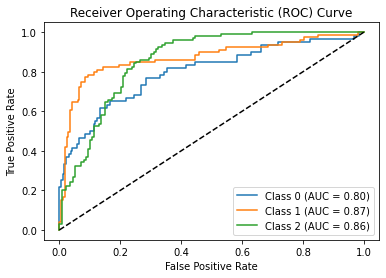

In [102]:
test_scores(model,'Logistic Regression',3)